<a href="https://colab.research.google.com/github/wahyunh10/Project-Ecommerce-Shipping-Clasification-Modeling/blob/main/Stage_3_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

In [3]:
df = pd.read_csv('Full_data.csv')

In [5]:
nums = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Discount_offered', 'Cost_of_the_Product', 'Weight_in_gms', 'Reached.on.Time_Y.N']
cats = ['Mode_of_Shipment', 'Product_importance', 'Gender','Warehouse_block']

In [6]:
df2 = df.copy()
print(f'Jumlah baris sebelum memfilter outlier: {len(df2)}')

filtered_entries1 = np.array([True] * len(df2))

for col in nums:
    zscore = abs(stats.zscore(df2[col])) # hitung absolute z-scorenya
    filtered_entries1 = (zscore < 3) & filtered_entries1 # keep yang kurang dari 3 absolute z-scorenya
    
df2 = df2[filtered_entries1] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df2)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 10642


In [7]:
df2['Customer_rating'] = MinMaxScaler().fit_transform(df2['Customer_rating'].values.reshape(len(df2), 1))

#Standarisasi :
df2['Customer_care_calls'] = StandardScaler().fit_transform(df2['Customer_care_calls'].values.reshape(len(df2), 1))
df2['Cost_of_the_Product'] = StandardScaler().fit_transform(df2['Cost_of_the_Product'].values.reshape(len(df2), 1))
df2['Prior_purchases'] = StandardScaler().fit_transform(df2['Prior_purchases'].values.reshape(len(df2), 1))
df2['Discount_offered'] = StandardScaler().fit_transform(df2['Discount_offered'].values.reshape(len(df2), 1))
df2['Weight_in_gms'] = StandardScaler().fit_transform(df2['Weight_in_gms'].values.reshape(len(df2), 1))

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10642 non-null  int64  
 1   Warehouse_block      10642 non-null  object 
 2   Mode_of_Shipment     10642 non-null  object 
 3   Customer_care_calls  10642 non-null  float64
 4   Customer_rating      10642 non-null  float64
 5   Cost_of_the_Product  10642 non-null  float64
 6   Prior_purchases      10642 non-null  float64
 7   Product_importance   10642 non-null  object 
 8   Gender               10642 non-null  object 
 9   Discount_offered     10642 non-null  float64
 10  Weight_in_gms        10642 non-null  float64
 11  Reached.on.Time_Y.N  10642 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 1.1+ MB


In [9]:
df2.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10642.000000,1.064200e+04,10642.000000,1.064200e+04,1.064200e+04,1.064200e+04,1.064200e+04,10642.000000
mean,5570.347773,2.777540e-16,0.497298,-5.341423e-17,-1.068285e-16,2.136569e-17,6.409707e-17,0.590303
std,3159.806013,1.000047e+00,0.353086,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,0.491801
min,1.000000,-1.803627e+00,0.000000,-2.383302e+00,-1.135516e+00,-7.689960e-01,-1.613343e+00,0.000000
25%,2881.250000,-9.304889e-01,0.250000,-8.440579e-01,-3.595969e-01,-5.688870e-01,-1.103516e+00,0.000000
50%,5604.500000,-5.735048e-02,0.500000,9.196863e-02,-3.595969e-01,-3.687781e-01,3.204627e-01,1.000000
75%,8300.750000,8.157880e-01,0.750000,8.407899e-01,4.163217e-01,-1.686692e-01,8.642883e-01,1.000000
max,10999.000000,2.562065e+00,1.000000,2.068025e+00,3.519996e+00,3.233183e+00,2.561018e+00,1.000000


In [10]:
# df2['log_prior_purchases'] = np.log(df2['Prior_purchases'])
# df2['log_discount_offered'] = np.log(df2['Discount_offered'])
# df2['log_weight_in_gms'] = np.log(df2['Weight_in_gms'])
# df2['log_cost_of_the_Product'] = np.log(df2['Cost_of_the_Product'])
# df2['log_customer_care_calls'] = np.log(df2['Customer_care_calls'])

# df2 = df2.drop(columns=['ID', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms','Cost_of_the_Product', 'Customer_care_calls'])
# df2.describe()

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10642 non-null  int64  
 1   Warehouse_block      10642 non-null  object 
 2   Mode_of_Shipment     10642 non-null  object 
 3   Customer_care_calls  10642 non-null  float64
 4   Customer_rating      10642 non-null  float64
 5   Cost_of_the_Product  10642 non-null  float64
 6   Prior_purchases      10642 non-null  float64
 7   Product_importance   10642 non-null  object 
 8   Gender               10642 non-null  object 
 9   Discount_offered     10642 non-null  float64
 10  Weight_in_gms        10642 non-null  float64
 11  Reached.on.Time_Y.N  10642 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 1.1+ MB


In [12]:
# Label Encoding
mapping_Product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2
}

mapping_Gender = {
    'F' : 0,
    'M' : 1
}

df2['Product_importance'] = df2['Product_importance'].map(mapping_Product_importance)
df2['Gender'] = df2['Gender'].map(mapping_Gender)

In [13]:
for cat in ['Mode_of_Shipment', 'Warehouse_block']:
    onehots = pd.get_dummies(df2[cat], prefix=cat)
    df2 = df2.join(onehots)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10642 entries, 0 to 10998
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10642 non-null  int64  
 1   Warehouse_block          10642 non-null  object 
 2   Mode_of_Shipment         10642 non-null  object 
 3   Customer_care_calls      10642 non-null  float64
 4   Customer_rating          10642 non-null  float64
 5   Cost_of_the_Product      10642 non-null  float64
 6   Prior_purchases          10642 non-null  float64
 7   Product_importance       10642 non-null  int64  
 8   Gender                   10642 non-null  int64  
 9   Discount_offered         10642 non-null  float64
 10  Weight_in_gms            10642 non-null  float64
 11  Reached.on.Time_Y.N      10642 non-null  int64  
 12  Mode_of_Shipment_Flight  10642 non-null  uint8  
 13  Mode_of_Shipment_Road    10642 non-null  uint8  
 14  Mode_of_Shipment_Ship 

In [15]:
df2 = df2.drop(columns=['Mode_of_Shipment', 'Warehouse_block'])

In [16]:
df2.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F
count,10642.000000,1.064200e+04,10642.000000,1.064200e+04,1.064200e+04,10642.000000,10642.000000,1.064200e+04,1.064200e+04,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000,10642.000000
mean,5570.347773,2.777540e-16,0.497298,-5.341423e-17,-1.068285e-16,0.596786,0.496711,2.136569e-17,6.409707e-17,0.590303,0.162375,0.160026,0.677598,0.166980,0.167074,0.166416,0.166980,0.332550
std,3159.806013,1.000047e+00,0.353086,1.000047e+00,1.000047e+00,0.637518,0.500013,1.000047e+00,1.000047e+00,0.491801,0.368812,0.366648,0.467418,0.372975,0.373059,0.372471,0.372975,0.471149
min,1.000000,-1.803627e+00,0.000000,-2.383302e+00,-1.135516e+00,0.000000,0.000000,-7.689960e-01,-1.613343e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2881.250000,-9.304889e-01,0.250000,-8.440579e-01,-3.595969e-01,0.000000,0.000000,-5.688870e-01,-1.103516e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5604.500000,-5.735048e-02,0.500000,9.196863e-02,-3.595969e-01,1.000000,0.000000,-3.687781e-01,3.204627e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8300.750000,8.157880e-01,0.750000,8.407899e-01,4.163217e-01,1.000000,1.000000,-1.686692e-01,8.642883e-01,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,10999.000000,2.562065e+00,1.000000,2.068025e+00,3.519996e+00,2.000000,1.000000,3.233183e+00,2.561018e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
# #export data clean and transform
df2.to_csv('data_clean.csv', index=False)

# **RandomForest**

In [20]:
def model_evaluation(model, pred, xtrain, ytrain, xtest, ytest):
    print('Accuracy : %.2f' % accuracy_score(ytest, pred))
    print('Precision : %.2f' % precision_score(ytest, pred))
    print('Recall : %.2f' % recall_score(ytest, pred))
    print('F-1Score : %.2f' % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) 
    print('ROC AUC : %.2f' % auc(fpr, tpr))
    
    # Average precision score
    average_precision = average_precision_score(ytest, pred)
    print('AP : %.2f'% average_precision)

In [21]:
# Feature Importance Function
def feature_importance(model, x):
    feat_importances = pd.Series(model.best_estimator_.feature_importances_, index = x.columns)
    ax = feat_importances.nlargest(25).plot(kind = 'barh', figsize = (10, 8))
    ax.invert_yaxis()

# Best Hyperparameter Function
def best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [22]:
X = df2.drop(columns = ['ID','Reached.on.Time_Y.N','Customer_care_calls', 'Customer_rating'])
y = df2['Reached.on.Time_Y.N']

In [23]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import validation_curve

# Evaluation Metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_train, y_train, X_test, y_test)
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

Accuracy : 0.65
Precision : 0.72
Recall : 0.64
F-1Score : 0.68
ROC AUC : 0.65
AP : 0.67


In [24]:
# Model Validation Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  1.0
test Accuracy :  0.6481916392672616


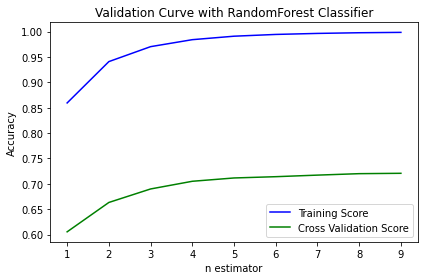

In [25]:
# Hyperparameter Tuning Random Forest
parameter_range = np.arange(1, 10, 1)

train_score, test_score = validation_curve(
                                RandomForestClassifier(random_state = 42),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = parameter_range,
                                cv = 5,
                                scoring = 'roc_auc') 


# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("n estimator")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [26]:
# Evaluation Metrics
model = RandomForestClassifier(random_state = 42, n_estimators = 8, max_depth = 4, min_samples_split = 5, min_samples_leaf = 2)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_train, y_train, X_test, y_test)

Accuracy : 0.61
Precision : 0.62
Recall : 0.86
F-1Score : 0.72
ROC AUC : 0.57
AP : 0.61


In [27]:
# Model Prediction
prediction_train = model.predict(X_train)
prediction_train

array([1, 1, 0, ..., 1, 1, 1])

In [28]:
# Model Validation Average Precision
print('AP train: ',average_precision_score(y_train, prediction_train))
print('AP test: ',average_precision_score(y_test, prediction))

AP train:  0.637838502871672
AP test:  0.6127122047085208


In [29]:
# Model Validation Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.6382003993891695
test Accuracy :  0.6120244246124942


Text(0.5, 1.0, 'feature importance score')

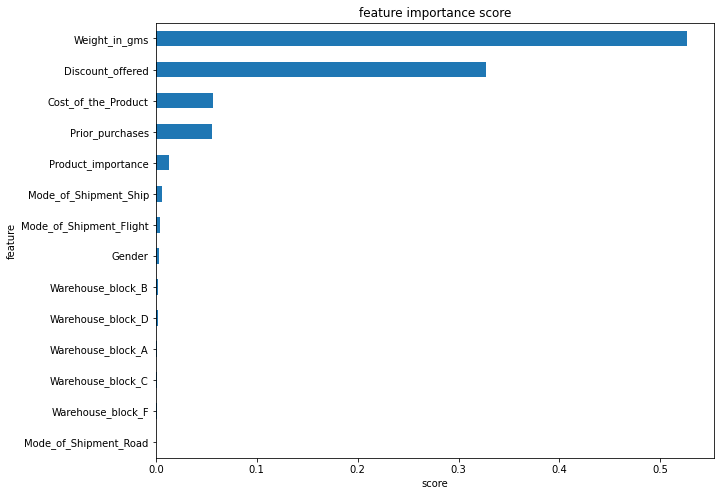

In [30]:
#plt.figsize(10, 8)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

In [31]:
# Split Feature and Label
X = df2.drop(columns=['ID','Customer_care_calls','Customer_rating','Gender','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C', 'Warehouse_block_F', 'Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship', 'Warehouse_block_D','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label
# Evaluation Metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_train, y_train, X_test, y_test)
param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

Accuracy : 0.65
Precision : 0.71
Recall : 0.66
F-1Score : 0.68
ROC AUC : 0.65
AP : 0.67


In [32]:
# Model Validation Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  1.0
test Accuracy :  0.6486613433536872


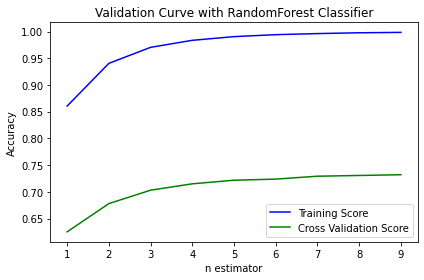

In [33]:
# Hyperparameter Tuning Random Forest
parameter_range = np.arange(1, 10, 1)

train_score, test_score = validation_curve(
                                RandomForestClassifier(random_state = 42),
                                X = X_train, y = y_train, 
                                param_name = 'n_estimators', 
                                param_range = parameter_range,
                                cv = 5,
                                scoring = 'roc_auc') 


# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# Creating the plot
plt.title("Validation Curve with RandomForest Classifier")
plt.xlabel("n estimator")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [34]:
# Evaluation Metrics
model = RandomForestClassifier(random_state = 42, n_estimators = 8, max_depth = 4, min_samples_split = 5, min_samples_leaf = 2)
model.fit(X_train, y_train)
prediction = model.predict(X_test)
model_evaluation(model, prediction, X_train, y_train, X_test, y_test)

Accuracy : 0.68
Precision : 0.82
Recall : 0.56
F-1Score : 0.67
ROC AUC : 0.70
AP : 0.71


In [35]:
# Model Validation Accuracy
print('train Accuracy : ', model.score(X_train, y_train))
print('test Accuracy : ', model.score(X_test, y_test))

train Accuracy :  0.6789615881592858
test Accuracy :  0.6754344762799437


Text(0.5, 1.0, 'feature importance score')

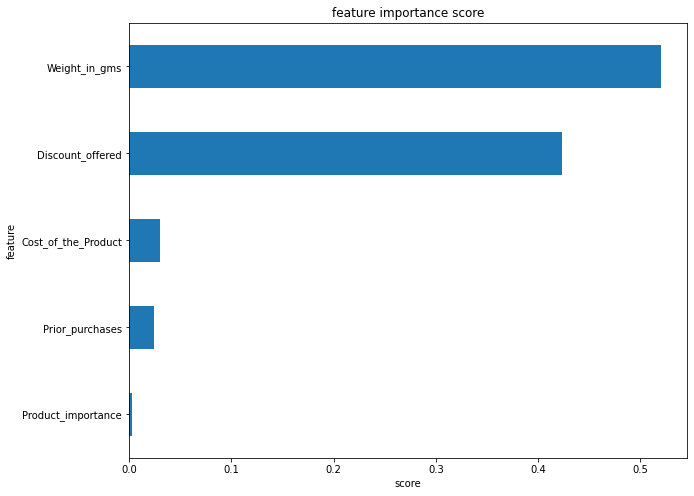

In [36]:
#plt.figsize(10, 8)
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

# **XGBOOST**

In [37]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(15, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

In [38]:
#data tanpa feature selection
# df2 = df1.drop(columns=['ID','Customer_care_calls', 'Customer_rating'])
# df1

In [39]:
# Split Feature and Label
X = df2.drop(columns=['ID','Customer_care_calls', 'Customer_rating','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.87
Recall (Test Set): 0.51
F1-Score (Test Set): 0.64
AUC: 0.70


In [40]:
print('Train score: ' + str(xg.score(X_train, y_train)))
print('Test score:' + str(xg.score(X_test, y_test)))

Train score: 0.6999882532597205
Test score:0.6712071395021136


In [41]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 9)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
    
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned1 = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned1.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned1.predict(X_test)#Check performa dari model
eval_classification(xg_tuned1, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.68
Recall (Test Set): 0.72
F1-Score (Test Set): 0.70
AUC: 0.63


In [42]:
print('Train score: ' + str(xg_tuned1.score(X_train, y_train)))
print('Test score:' + str(xg_tuned1.score(X_test, y_test)))

Train score: 0.762938418300392
Test score:0.7309610679175896


In [ ]:
show_feature_importance(xg_tuned1.best_estimator_)

In [ ]:
#data dengan feature selection
# df2=df.copy()
# df2 = df2.drop(columns=['ID','Customer_care_calls','Customer_rating','Gender','Product_importance','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C', 'Warehouse_block_F', 'Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship', 'Cost_of_the_Product'])
# df2

In [ ]:
# Split Feature and Label
X = df2.drop(columns=['ID','Customer_care_calls','Customer_rating','Gender','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C', 'Warehouse_block_F', 'Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship', 'Warehouse_block_D','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(xg.score(X_train, y_train)))
print('Test score:' + str(xg.score(X_test, y_test)))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 9)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],
    
                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned2 = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='roc_auc')
xg_tuned2.fit(X_train,y_train)

# Predict & Evaluation
y_pred = xg_tuned2.predict(X_test)#Check performa dari model
eval_classification(xg_tuned2, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
print('Train score: ' + str(xg_tuned2.score(X_train, y_train)))
print('Test score:' + str(xg_tuned2.score(X_test, y_test)))

In [ ]:
show_feature_importance(xg_tuned2.best_estimator_)

# **lightGBM**

In [ ]:
import lightgbm as ltb

In [ ]:
x = df2[['Discount_offered', 'Weight_in_gms', 'Cost_of_the_Product','Prior_purchases']] # feature yang kita gunakan
y = df2['Reached.on.Time_Y.N'] # variable target

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
model = ltb.LGBMClassifier(learning_rate=0.09,num_leaves = 3, max_depth=2,random_state=42, num_iterations=132)
model.fit(xtrain,ytrain,eval_set=[(xtest,ytest),(xtrain,ytrain)],eval_metric='auc')
print(); print(model)
    
expectedy  = ytest
predictedy = model.predict(xtest)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(expectedy, predictedy))
print(metrics.confusion_matrix(expectedy, predictedy))

In [ ]:
ltb.plot_importance(model)

# **KNN**

In [ ]:
# import warnings
# warnings.filterwarnings('ignore')

# import matplotlib.pyplot as plt
# import pandas as pd
# import numpy as np
# import seaborn as sns

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

In [ ]:
# df = pd.read_csv("data_clean_new.csv")
# df.info()

In [ ]:
#import pandas as pd
#df = pd.read_csv("data_clean_new.csv")

# Split Feature and Label
X = df2.drop(columns=['ID', 'Reached.on.Time_Y.N', 'Customer_care_calls', 'Customer_rating'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# **Init Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

# **Tune Hyperparameter with RandomSearch**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(2,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='roc_auc')

# Fit Model & Evaluasi
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

In [ ]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #accuracy
print('Test score:' + str(model.score(X_test, y_test))) #accuracy

# **Decision Tree**

In [ ]:

X = df2.drop(columns=['ID','Reached.on.Time_Y.N'])
y = df2['Reached.on.Time_Y.N'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)